<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

# Area Between Curves and Wealth Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Warm Up Problem: 1991 AP Calculus BC3

Let $R$ be the shaded region in the first quadrant enclosed by the $y$-axis and the graphs of $y = \sin(x)$ and $y = \cos(x)$.

1. Find the area of $R$.
2. Find the volume of the solid generated when $R$ is revolved about the $x$-axis.
3. Find the volume of the solid whose base is $R$ and whose cross sections cut by planes perpendicular to the $x$-axis are squares.

# Wealth Distribution

One way that we might understand equality is through understanding the distribution of wealth in a society.  Perfect wealth distribution would mean that all participants have the same share of wealth as everyone else.  We can represent this situation mathematically with a function $L(x) = x$ that we will call the **Lorenz Curve**. 

Concretely, if we were to look at every 20% of the population, we would see 20% of income.

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 20 |
| Lowest two - Fifths | 40 |
| Lowest three - Fifths | 60 |
| Lowest four - Fifths | 80 |
| Lowest five - Fifths | 100 |



In [2]:
percent = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
lorenz = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

Text(0.5, 1.0, 'Perfect Wealth Distribution')

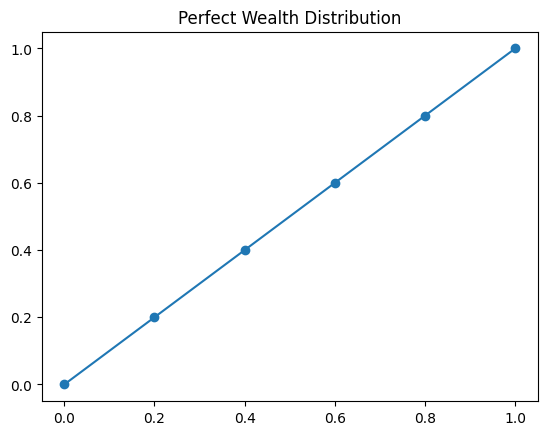

In [3]:
plt.plot(percent, lorenz, '-o')
plt.title("Perfect Wealth Distribution")

It is unlikely that we have perfect distribution of wealth in a society however.  For example, the following table describes the cumulative distribution of income in the United States for the year 1994.  

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 4.2 |
| Lowest two - Fifths | 14.2 |
| Lowest three - Fifths | 29.9 |
| Lowest four - Fifths | 53.2 |
| Lowest five - Fifths | 100.0 |

In [4]:
usa_94 = [0, 0.042, 0.142, 0.299, 0.532, 1.00]

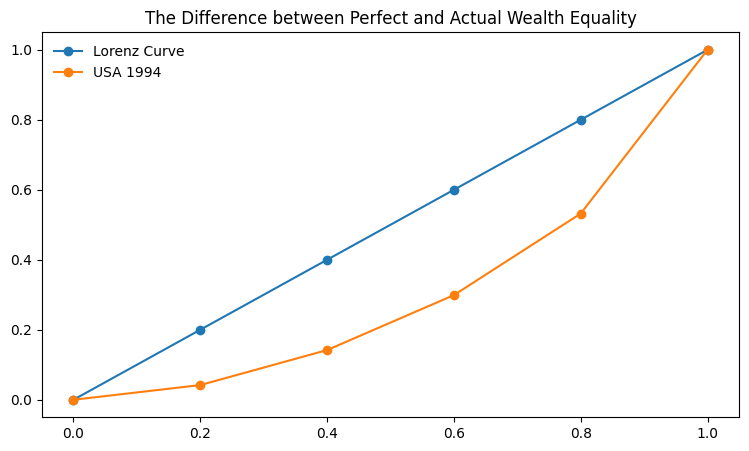

In [5]:
plt.figure(figsize = (9, 5))
plt.plot(percent, lorenz, '-o', label = 'Lorenz Curve')
plt.plot(percent, usa_94, '-o', label = 'USA 1994')
plt.title("The Difference between Perfect and Actual Wealth Equality")
plt.legend(loc = 'best', frameon = False)

The area between these curves can be understood to represent the discrepency between perfect wealth distribution and levels of inequality.  Further, if we examine the ratio between this area and that under the **Lorenz Curve** we get the **Gini Index**.  

One big issue remains however.  We don't want to use rectangles to approximate these regions but we don't have equations for the actual distribution of wealth.  We introduce two curve fitting techniques using `numpy` to address this problem.

## Quadratic Fit

The curve in the figure above representing the actual distribution of wealth in the USA in 1994 can be approximated by a polynomial function.  NumPy has a function called `polyfit` that will fit a polynomial to a set of points.  Here, we use `polyfit` to fit a quadratic function to the points.

In [6]:
np.polyfit(percent, usa_94, deg=2)

array([ 1.18839286, -0.24167857,  0.02092857])

In [7]:
coefs = np.polyfit(percent, usa_94, deg = 2)

In [8]:
def fit(x):
    return coefs[0]*x**2 + coefs[1]*x + coefs[2]

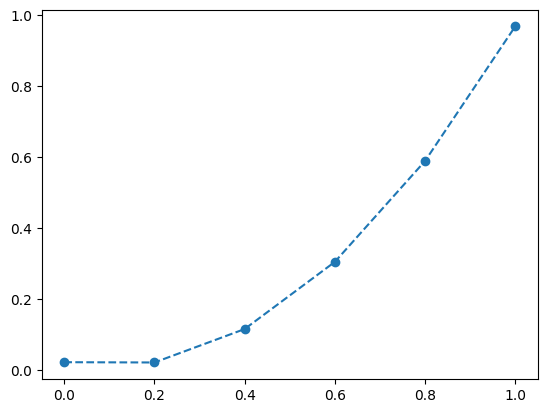

In [9]:
plt.plot(percent, [fit(i) for i in percent], '--o')

In [10]:
fit = np.poly1d(np.polyfit(percent, usa_94, 2))

In [11]:
fit

poly1d([ 1.18839286, -0.24167857,  0.02092857])

In [12]:
fit(0)

0.020928571428571296

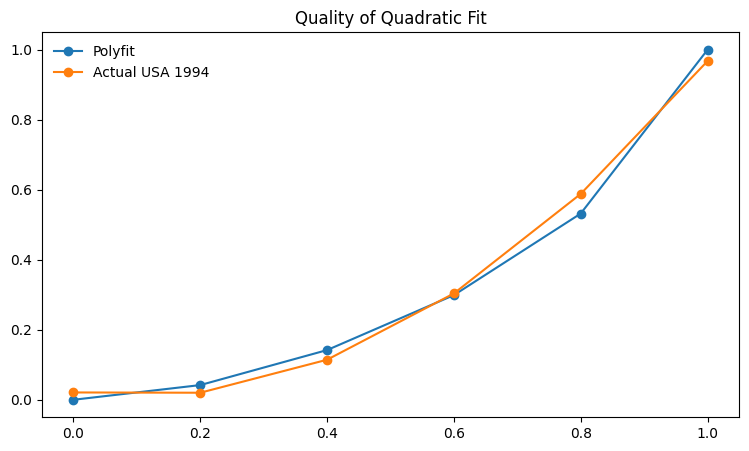

In [13]:
plt.figure(figsize = (9, 5))
plt.plot(percent, usa_94, '-o', label = 'Polyfit')
plt.plot(percent, fit(percent), '-o', label = 'Actual USA 1994')
plt.title("Quality of Quadratic Fit")
plt.legend(loc = 'best', frameon = False)

### Getting the Fit

Below, we return to the complete picture where we plot our fitted function and the **Lorenz Curve** and shade the area that represents the difference in income distribution.

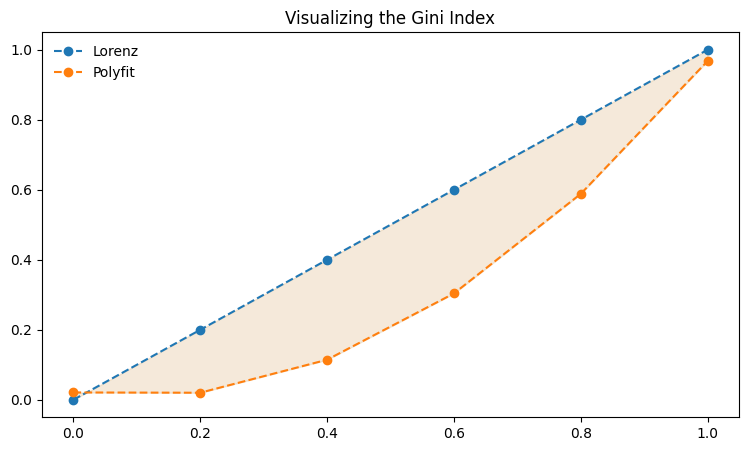

In [14]:
plt.figure(figsize = (9, 5))
plt.plot(percent, lorenz, '--o', label = 'Lorenz')
plt.plot(percent, fit(percent), '--o', label = 'Polyfit')
plt.fill_between(percent, lorenz, fit(percent), alpha = 0.3, color = 'burlywood')
plt.title("Visualizing the Gini Index")
plt.legend(loc = 'best', frameon = False)

Now, we want to compute the ratio between the area between the curves to that under the **Lorenz Curve**.  We can do this easily in Sympy but declaring $x$ a symbol and substituting it into our fit function then integrating this.

In [15]:
import sympy as sy

In [16]:
x = sy.Symbol('x')
fit(x)

x*(1.18839285714286*x - 0.241678571428571) + 0.0209285714285713

In [17]:
A_btwn = sy.integrate((x - fit(x)), (x, 0, 1))

In [18]:
A_L = sy.integrate(x, (x, 0,1))

In [19]:
A_btwn/A_L

0.407559523809524

### Inequality through Time

Now that we understand how to compute the Gini Index, we want to explore what improving the gap in wealth distribution would mean.  

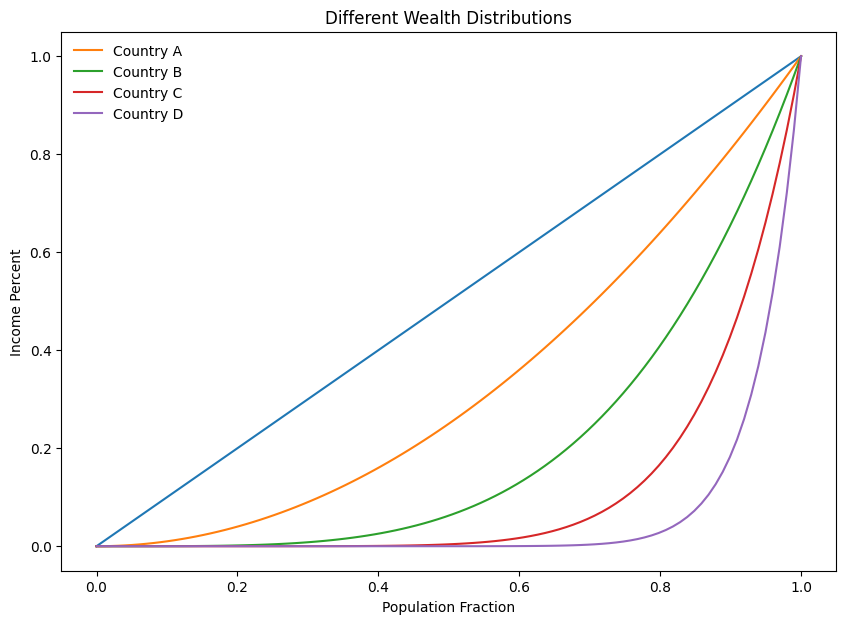

In [20]:
x = np.linspace(0, 1, 100)
plt.figure(figsize = (10, 7))
plt.plot(x, x)
plt.plot(x, x**2, label = "Country A")
plt.plot(x, x**4, label = "Country B")
plt.plot(x, x**8, label = "Country C")
plt.plot(x, x**16, label = "Country D")
plt.ylabel("Income Percent")
plt.xlabel("Population Fraction")
plt.title("Different Wealth Distributions")
plt.legend(loc = "best", frameon = False)

Which of the above countries do you believe is the most equitable?  Why?



### Census Bureau Data and Pandas

There are many organizations that use the Gini Index to this day.  The OECD, World Bank, and US Census all track Gini Indicies.  We want to investigate the real data much as we have with our smaller examples.  To do so, we will use the Pandas library.  

The table below gives distribution data for the years 1970, 1980, 1990, and 2000.  

| x | 0.0 | 0.2 | 0.4 | 0.6 | 0.8 | 1.0 |
| --- | --- | --- | --- | --- | --- | --- |
| 1970 | 0.000 | 0.041 | 0.149 | 0.323 | 0.568 | 1.000 |
| 1980 | 0.000 | 0.042 | 0.144 | 0.312 | 0.559 | 1.000 |
| 1990 | 0.000 | 0.038 | 0.134 | 0.293 | 0.530 | 1.000 |
| 2000 | 0.000 | 0.036 | 0.125 | 0.273 | 0.503 | 1.000 |

#### Creating the DataFrame

We will begin by creating a table from this data by entering lists with these values and creating a DataFrame from these lists.  



In [21]:
import pandas as pd
seventies = [0, 0.041, 0.149, 0.323, 0.568, 1.0]
eighties = [0, 0.042, 0.144, 0.312, 0.559, 1.0]
nineties = [0, 0.038, 0.134, 0.293, 0.53, 1.0]
twothou = [0, 0.036, 0.125, 0.273, 0.503, 1.0]

In [22]:
df = pd.DataFrame({'1970s': seventies, '1980s':eighties, '1990s': nineties,
                  '2000s': twothou, 'perfect': [0, 0.2, 0.4, 0.6, 0.8, 1.0]})
df.head()

,1970s,1980s,1990s,2000s,perfect
0,0.000,0.000,0.000,0.000,0.0
1,0.041,0.042,0.038,0.036,0.2
2,0.149,0.144,0.134,0.125,0.4
3,0.323,0.312,0.293,0.273,0.6
4,0.568,0.559,0.530,0.503,0.8


### Problems





**Problem 1**: Use the table below to find the Lorenz curve for the data.

| Fraction of People | Fraction of Income |
| ----------------   | ------------------ |
| 0.0 | 0.0 |
| 0.2 | 0.06 |
| 0.4 | 0.18 |
| 0.6 | 0.36 |
| 0.8 | 0.60 |
| 1.0 | 1.00 |






**Problem 2**: The table below shows how arable land is distributed among farmers in Bolivia, Denmark, and the United States.  In which country is the land most equally distributed?  The least?

| Fraction of Farmers | Fraction of Land Bolivia | Denmark | United States |
| -----------------   | -----------------------  | -------- | ------------ |
| 0.0 | 0.0 | 0.0 | 0.0 |
| 0.1 | 0.0 | 0.06 | 0.025 |
| 0.2 | 0.0 | 0.12 | 0.05 |
| 0.3 | 0.0 | 0.18 | 0.075 |
| 0.4 | 0.0 | 0.24 | 0.10 | 
| 0.5 | 0.010 | 0.30 | 0.13 |
| 0.6 | 0.016 | 0.36 | 0.18 |
| 0.7 | 0.022 | 0.45 | 0.22 |
| 0.8 | 0.03 | 0.54 | 0.28 |
| 0.9 | 0.04 | 0.70 | 0.42 |
| 1.0 | 1.00 | 1.00 | 1.00 |

**Problem 3**: The table below shows how population was divided among the 25 largest countries in 1963 and 1968.  Was there change in the population distribution between 1963 and 1968? How would the Lorenz curves for 1963 and 1968 compare? 

| Fraction of Countries | Fraction of Population 1963 | 1968 |
| --------------------  | --------------------------  | ----- |
| 0.0 | 0.0 | 0.0 |
| 0.2 | 0.046 | 0.048 |
| 0.4 | 0.105 | 0.107 |
| 0.6 | 0.193 | 0.194 |
| 0.8 | 0.345 | 0.347 |
| 1.0 | 1.000 | 1.00  |

**Problem 4**: The table below shows how gross national product (GNP) is distributed among the countries of the world:

| Fraction of Countries | Fraction of GNP |
| --------------------- | --------------- |
| 0.0 | 0.0 |
| 0.1 | 0.001 | 
| 0.2 | 0.002 | 
| 0.3 | 0.005 | 
| 0.4 | 0.010 |
| 0.5 | 0.018 | 
| 0.6 | 0.028 | 
| 0.7 | 0.058 |
| 0.8 | 0.11 |
| 0.9 | 0.21 |
| 1.0 | 1.00 |

a. Determine the Lorenz Curve for this data using the model you deem most appropriate.

b. Draw the Lorenz Curve and the curve for completely unequal distribution on the same axes.

c. Is the GNP divided equally or unequally among the countries of the world?  